# ECE143 individual project
This assignment is to use python to mimic ad-hoc system. 
The whole project was finished with 4 functions:
Tower genration function newTwer, overlap accumulation function accumulate, signal area trim function, and plot figure function. 



I generate new tower with 4 viables: x, y,wide, height, where (x,y) is the location of the tower(bottom left point of the signal area); wide and height was the size of the signal area.
Following is the detial of the function:

In [46]:
def newTower():#generate a new tower with random uniformly distribution
    import numpy as np
    import random
    x=random.randint(0,areaLimit-1)
    y=random.randint(0,areaLimit-1)
    wide = random.randint(1,areaLimit-x)
    height=random.randint(1,areaLimit-y)
        #random set the area
    rawData=[x,y,wide,height]
    user=matplotlib.patches.Rectangle((x,y),wide,height,color='yellow')
    return rawData,user

In the main function, I can call the function in this way:

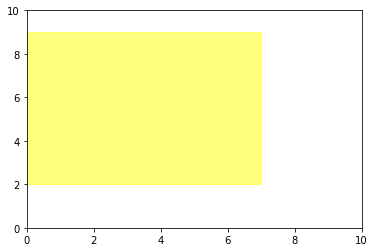

In [47]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


areaLimit=10
fig=plt.figure()
plt.xlim([0*areaLimit,areaLimit])
plt.ylim([0*areaLimit,areaLimit])
ax=fig.add_subplot(111)
rawData,user=newTower()
user=matplotlib.patches.Rectangle((rawData[0],rawData[1]),rawData[2],rawData[3],color='yellow',alpha=0.5)
ax.add_patch(user)

then the second tower:

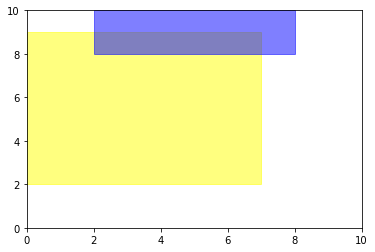

In [48]:
rawData,user=newTower()
user=matplotlib.patches.Rectangle((rawData[0],rawData[1]),rawData[2],rawData[3],color='blue',alpha=0.5)
ax.add_patch(user)
fig


Here we can see there are the overlap in these two signal tower, to avoid the overlap, I will use matrix to do the analysis. first, we set the whole area to be 10x10 list and was initiated as 10x10 zeros:

In [94]:
filled_points=np.zeros([areaLimit,areaLimit],dtype=int)
print filled_points

[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


as we notice that the first(yellow) rectangle is 7x7 , we will set it to be zero to note that these areas have been covered. rawData of the 1st rectangle should be [0,2,7,7], Then the filled_points should be as follows:

In [95]:
rawData=[0,2,7,7]
counts=np.zeros((rawData[3],rawData[2]),dtype=int)
for i in range(len(filled_points)):
    for j in range(len(filled_points[i])):
        assert filled_points[i][j] in [0,1]
    #filled tower signal should be list of [0,1]
for i in range(rawData[3]):
    for j in range(rawData[2]):
        filled_points[len(filled_points)-rawData[1]-rawData[3]+i][rawData[0]+j]=1
print filled_points

[[0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 0 0 0]
 [1 1 1 1 1 1 1 0 0 0]
 [1 1 1 1 1 1 1 0 0 0]
 [1 1 1 1 1 1 1 0 0 0]
 [1 1 1 1 1 1 1 0 0 0]
 [1 1 1 1 1 1 1 0 0 0]
 [1 1 1 1 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


New we are going to analysis the 2nd tower, which rawData[2,8,6,2]. However, we are going to just count the non-overlap part. If there is already signal covered, we are going to set the value to 0, and only there is no signal covered, we can set the value to 1. so that we will get:

In [96]:
rawData=[2,8,6,2]
counts=np.zeros((rawData[3],rawData[2]),dtype=int)
for i in range(rawData[3]):
    for j in range(rawData[2]):
        if filled_points[len(filled_points)-rawData[1]-rawData[3]+i][rawData[0]+j]==0:
            counts[i][j]=1
        else:
            counts[i][j]=0
        filled_points[len(filled_points)-rawData[1]-rawData[3]+i][rawData[0]+j]=1
print 'filled_points \n',filled_points
print "counts\n",counts

filled_points 
[[0 0 1 1 1 1 1 1 0 0]
 [1 1 1 1 1 1 1 1 0 0]
 [1 1 1 1 1 1 1 0 0 0]
 [1 1 1 1 1 1 1 0 0 0]
 [1 1 1 1 1 1 1 0 0 0]
 [1 1 1 1 1 1 1 0 0 0]
 [1 1 1 1 1 1 1 0 0 0]
 [1 1 1 1 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]
counts
[[1 1 1 1 1 1]
 [0 0 0 0 0 1]]


in filled_points "1" means signal cover (before-trimmed), and '0' means no signal cover. Then we get the array counts to trim as above. In array counts, 1 means no overlap, 0 means overlapped. Then, we are going to use function accumulate to accumulate the counts one row by one row, the total procedure was included in function accumulate:

In [97]:
def accumulate(filled_points,rawData):
    counts=np.zeros((rawData[3],rawData[2]),dtype=int)
    for i in range(len(filled_points)):
        for j in range(len(filled_points[i])):
            assert filled_points[i][j] in [0,1]
    #filled tower signal should be list of [0,1]
    for i in range(rawData[3]):
        for j in range(rawData[2]):
            if filled_points[len(filled_points)-rawData[1]-rawData[3]+i][rawData[0]+j]==0:
                counts[i][j]=1
            else:
                counts[i][j]=0
    accum=np.zeros((rawData[3],rawData[2]),dtype=int)
    max_area=0
    for i in range(0,len(counts)):
        if i==0:
            accum[i]=counts[i]
        
        else:
            for j in range(len(counts[i])):
                if counts[i][j]==0:
                    accum[i][j]=0
                else:
                    accum[i][j]=accumulate[i-1][j]+1
    return accumulate

I will use the exaple above to show how the accumlate works:

In [98]:
accum=np.zeros((rawData[3],rawData[2]),dtype=int)
max_area=0
for i in range(0,len(counts)):
    if i==0:
        accum[i]=counts[i]
        
    else:
        for j in range(len(counts[i])):
            if counts[i][j]==0:
                accum[i][j]=0
            else:
                accum[i][j]=accum[i-1][j]+1
print accum

[[1 1 1 1 1 1]
 [0 0 0 0 0 2]]


Then I will use row_max(a) and trim_rec(accumulate)function to trim the rectangle and get the rawData of trimmed rectangle:

In [124]:
def row_max(a):
    
    max_area=0
    for i in range(len(a)):
        area=0
        if a[i]==0:
            continue
        elif a[i]==1:
            for j in range(i,len(a)):
                if a[j]>0:
                    area=area+1
                    x=i
                    print i,j,x,area
                else:
                    break
            if area>max_area:
                max_area=area
                xx=x+1
                print i,x
                h=1
            
        elif a[i]>1:
            for k in range(1,a[i]+1):
                area=0
                for j in range(i,len(a)):
                    if a[j]>=k:
                        area=area+k
                    else: break
                if area>max_area:
                    max_area=area
                    xx=i+1
                    h=k-1
    return max_area,xx,h
def trim_rec(accumulate):
    max_area=0
    for i in range(len(accumulate)):
        area,x,height=row_max(accumulate[i])
        if area>max_area:
            max_area,x,height=row_max(accumulate[i])
            y=i
            wide=max_area/height
    return max_area,x+3,areaLimit-y-1,wide,height

From the array accum, we can we directly see from array accum, the 1st row will form a rectangle with area of 5, while from the 2nd row, we can also trim a rectangle with area of 2, in that case, after compare the area, we know trim the area to the first row should be a good choice. We can also derive the rawData of trimmed rectangle: 

In [125]:
# max_area=0
# for i in range(len(accum)):
#     area,x,height=row_max(accum[i])
#     print area,x,height
#     if area>max_area:
#         max_area=area
#         max_area,x,height=row_max(accum[i])
#         y=i
#         wide=max_area/height
#     else:
#         continue
max_area,x,y,wide,height=trim_rec(accum)
print max_area,x,y,wide,height

0 0 0 1
0 1 0 2
0 2 0 3
0 3 0 4
0 4 0 5
0 5 0 6
0 0
1 1 1 1
1 2 1 2
1 3 1 3
1 4 1 4
1 5 1 5
2 2 2 1
2 3 2 2
2 4 2 3
2 5 2 4
3 3 3 1
3 4 3 2
3 5 3 3
4 4 4 1
4 5 4 2
5 5 5 1
0 0 0 1
0 1 0 2
0 2 0 3
0 3 0 4
0 4 0 5
0 5 0 6
0 0
1 1 1 1
1 2 1 2
1 3 1 3
1 4 1 4
1 5 1 5
2 2 2 1
2 3 2 2
2 4 2 3
2 5 2 4
3 3 3 1
3 4 3 2
3 5 3 3
4 4 4 1
4 5 4 2
5 5 5 1
6 9 9 6 1
